In [1]:
import pandas as pd
data = pd.read_csv("pima-indians-diabetes.data.csv", header = None)
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X = data.iloc[:, :-1]
y = data.iloc[:, 8]
X.shape, y.shape

((768, 8), (768,))

In [3]:
from neuroboa.nn import NN
from neuroboa.layers import Dense, Activation
from neuroboa.optims import Adam, SGD
from neuroboa.functions import ReLU, Sigmoid, Swish, Softmax, Tanh
from neuroboa.losses import BinaryCrossEntropy, MSE
from neuroboa.constants import TQDM_NOTEBOOK, TQDM_TERMINAL

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
one_hot = OneHotEncoder()
fit = one_hot.fit(y.values.reshape(-1, 1))
labels = fit.transform(y.values.reshape(-1, 1))
labels.toarray()

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [5]:
from sklearn.model_selection import train_test_split

X_tr, X_t, y_tr, y_t = train_test_split(X, y.values.reshape(-1, 1), test_size = 0.33, random_state = 42)

In [6]:
y_tr.shape

(514, 1)

In [7]:
nn = NN([
    Dense(1000, input_shape = (8, )),
    Activation(ReLU()),
    Dense(100),
    Activation(Tanh()),
    Dense(500),
    Activation(ReLU()),
    Dense(1),
    Activation(Sigmoid())
])

nn.fit(X_tr, y_tr, epochs = 150, batch_size = 10, optimizer = Adam(), loss = BinaryCrossEntropy(), show_progress = TQDM_TERMINAL)

Epoch: 150: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:02<00:00, 55.27it/s]


Plot: True


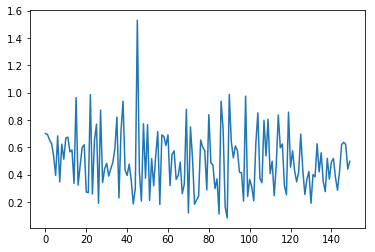

In [8]:
import matplotlib.pyplot as plt
import numpy as np
loss_list = nn.get_loss_list()
plt.plot(range(len(loss_list)), loss_list)

In [9]:
from keras.models import Sequential
from keras import layers
from keras.metrics import binary_accuracy

model = Sequential([
    layers.Dense(1000, activation = "relu"),
    layers.Dense(100, activation = "tanh"),
    layers.Dense(500, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[binary_accuracy])
history = model.fit(X_tr, y_tr, validation_split=0.33, epochs=150, batch_size=10, verbose=3)

Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 344 samples, validate on 170 samples
Epoch 1/150
Epoch 2/150
Epoch 3/150
Epoch 4/150
Epoch 5/150
Epoch 6/150
Epoch 7/150
Epoch 8/150
Epoch 9/150
Epoch 10/150
Epoch 11/150
Epoch 12/150
Epoch 13/150
Epoch 14/150
Epoch 15/150
Epoch 16/150
Epoch 17/150
Epoch 18/150
Epoch 19/150
Epoch 20/150
Epoch 21/150
Epoch 22/150
Epoch 23/150
Epoch 24/150
Epoch 25/150
Epoch 26/150
Epoch 27/150
Epoch 28/150
Epoch 29/150
Epoch 30/150
Epoch 31/150
Epoch 32/150
Epoch 33/150
Epoch 34/150
Epoch 35/150
Epoch 36/150
Epoch 37/150
Epoch 38/150
Epoch 39/150
Epoch 40/150
Epoch 41/150
Epoch 42/150
Epoch 43/150
Epoch 44/150
Epoch 45/150
Epoch 46/150
Epoch 47/150
Epoch 48/150
Epoch 49/150
Epoch 50/150
Epoch 51/150
Epoch 52/150
Epoch 53/150
Epoch 54/150
Epoch 55/150
Epoch 56/150
Epoch 57/150
Epoch 58/150
Epoch 59/150
Epoch 60/150
Epoch 61/150
Epoch 62/150
Epoch 63/150
Epoch 64/150
Epoch 65/150
Epoch 66/150
Epoch 67/1

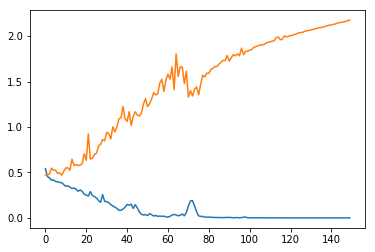

In [10]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [11]:
from keras.metrics import binary_crossentropy

y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]

print(binary_crossentropy(y_true, y_pred).numpy())
print(BinaryCrossEntropy().loss(np.array(y_true), np.array(y_pred)))

AttributeError: 'Tensor' object has no attribute 'numpy'

In [12]:
from sklearn.metrics import log_loss, accuracy_score


In [14]:
import numpy as np
outputs = np.round(nn.predict(X_t))
keras_outputs = np.round(model.predict(X_t))
accuracy_score(outputs, y_t), accuracy_score(keras_outputs, y_t)

total1, total2 = 0.0, 0.0
print(outputs.shape, keras_outputs.shape, y_t.shape)
for o, k, y in zip(outputs, keras_outputs, y_t):
    total1 += (o == y)
    total2 += (k == y)
    
print(total1 / len(y_t), total2 / len(y_t))

(254, 1) (254, 1) (254, 1)
[0.7480315] [0.67322835]
